# Comparison of Bearing Fault Types (Time Domain)

This notebook plots the acceleration signals for 3 types of bearing faults: **Outer Race**, **Inner Race**, and **Ball** (Rolling Element).
It uses the Tandon & Choudhury model parameters consistent with `acceleration.ipynb`.

**Parameters:**
*   RPM: 1730
*   Fault Diameter: 0.178 mm
*   Bearing: 6205-2 RS
*   Observation Duration: 0.1 s
*   Sampling Frequency: 12 kHz


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('src'))
import bearing_utils as bu

# Reload to ensure latest changes are picked up if editing utils interactively
import importlib
importlib.reload(bu)

# ==========================================
# 1. DEFINE PARAMETERS
# ==========================================
rpm_val = 1730
fault_mm = 0.178
sampling_rate = 12000
duration = 0.1

def synthesize_time_signal_from_spectrum(df_spectrum, duration_sec=0.1, fs_hz=12000):
    """
    Reconstructs time-domain acceleration signal a(t) from a frequency spectrum.
    Assumes zero phase for all components (worst-case summation).
    a(t) = Sum( Amp_i * cos(2*pi*f_i * t) )
    """
    t = np.arange(0, duration_sec, 1/fs_hz)
    signal = np.zeros_like(t)
    
    # df_spectrum must have 'Frequency_Hz' and 'Amplitude_Accel_m_s2'
    # Rename columns if necessary to match bearing_utils output standards
    # bearing_utils returns: 'Frequency_Hz' and 'Amplitude_Accel_m_s2' (or 'Amplitude_m_s2')
    
    if 'Amplitude_m_s2' in df_spectrum.columns:
        amp_col = 'Amplitude_m_s2'
    else:
        amp_col = 'Amplitude_Accel_m_s2'
        
    for _, row in df_spectrum.iterrows():
        f_hz = row['Frequency_Hz']
        A_amp = row[amp_col]
        
        # Add component
        signal += A_amp * np.cos(2 * np.pi * f_hz * t)
        
    return t, signal


### 1. Outer Race Fault

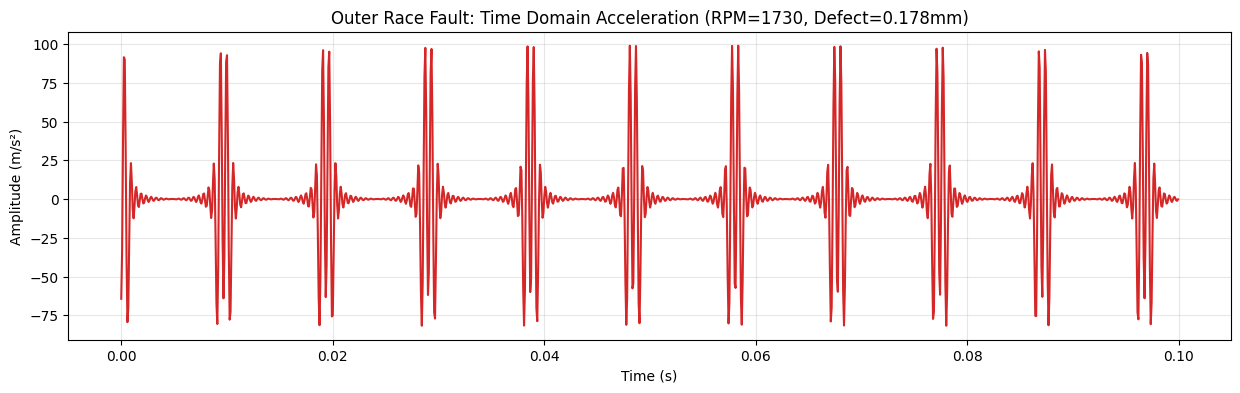

In [2]:
# Get Spectrum
df_outer = bu.calcular_espectro_outer_race(fault_mm, rpm_val, max_harmonics=20)

# Synthesize Time Signal
t_outer, sig_outer = synthesize_time_signal_from_spectrum(df_outer, duration, sampling_rate)

# Plot
plt.figure(figsize=(15, 4))
plt.plot(t_outer, sig_outer, color='tab:red')
plt.title(f'Outer Race Fault: Time Domain Acceleration (RPM={rpm_val}, Defect={fault_mm}mm)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m/s²)')
plt.grid(True, alpha=0.3)
plt.show()

### 2. Inner Race Fault

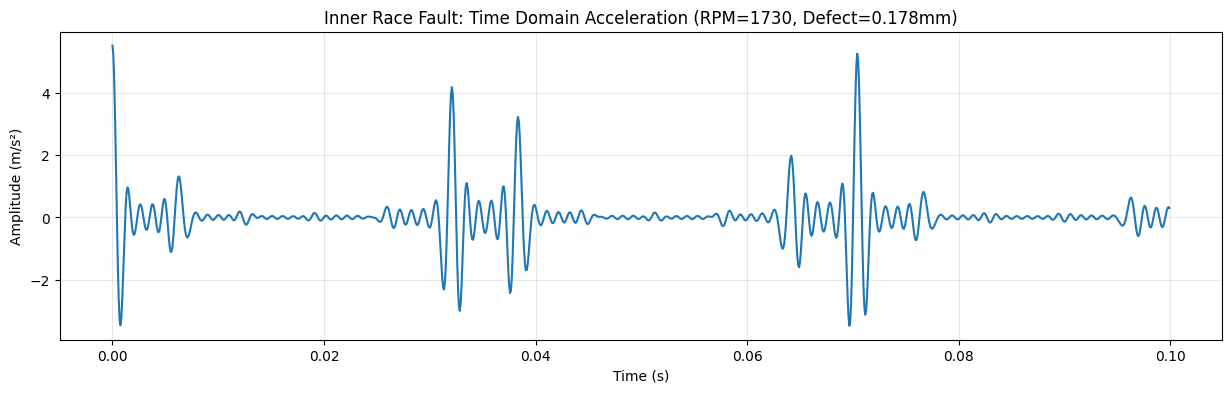

In [3]:
# Get Spectrum
df_inner = bu.calcular_espectro_inner_completo(fault_mm, rpm_val, max_harmonics=10, num_sidebands=5)

# Synthesize Time Signal
t_inner, sig_inner = synthesize_time_signal_from_spectrum(df_inner, duration, sampling_rate)

# Plot
plt.figure(figsize=(15, 4))
plt.plot(t_inner, sig_inner, color='tab:blue')
plt.title(f'Inner Race Fault: Time Domain Acceleration (RPM={rpm_val}, Defect={fault_mm}mm)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m/s²)')
plt.grid(True, alpha=0.3)
plt.show()

### 3. Ball (Rolling Element) Fault

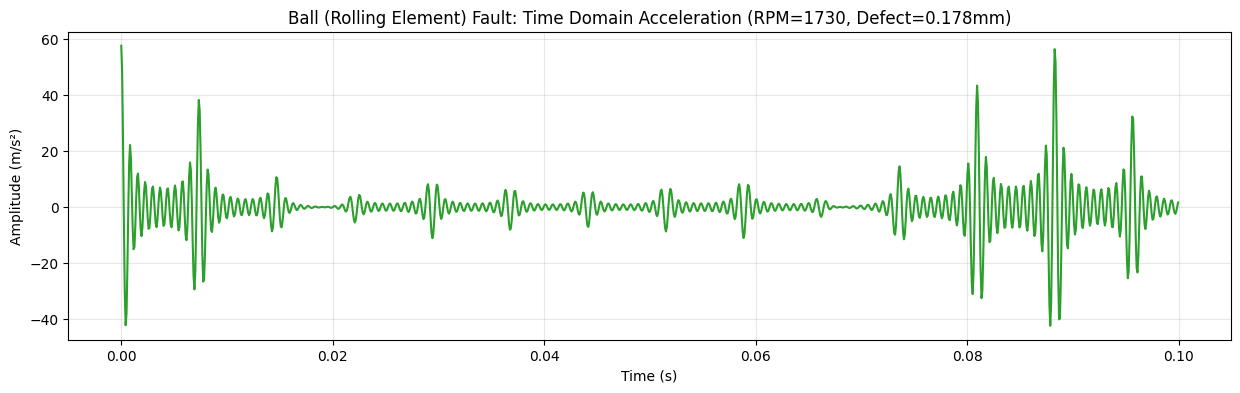

In [4]:
# Get Spectrum
df_ball = bu.calcular_espectro_ball_completo(fault_mm, rpm_val, max_harmonics=10, num_sidebands=5)

# Synthesize Time Signal
t_ball, sig_ball = synthesize_time_signal_from_spectrum(df_ball, duration, sampling_rate)

# Plot
plt.figure(figsize=(15, 4))
plt.plot(t_ball, sig_ball, color='tab:green')
plt.title(f'Ball (Rolling Element) Fault: Time Domain Acceleration (RPM={rpm_val}, Defect={fault_mm}mm)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m/s²)')
plt.grid(True, alpha=0.3)
plt.show()

### Comparison of All Three

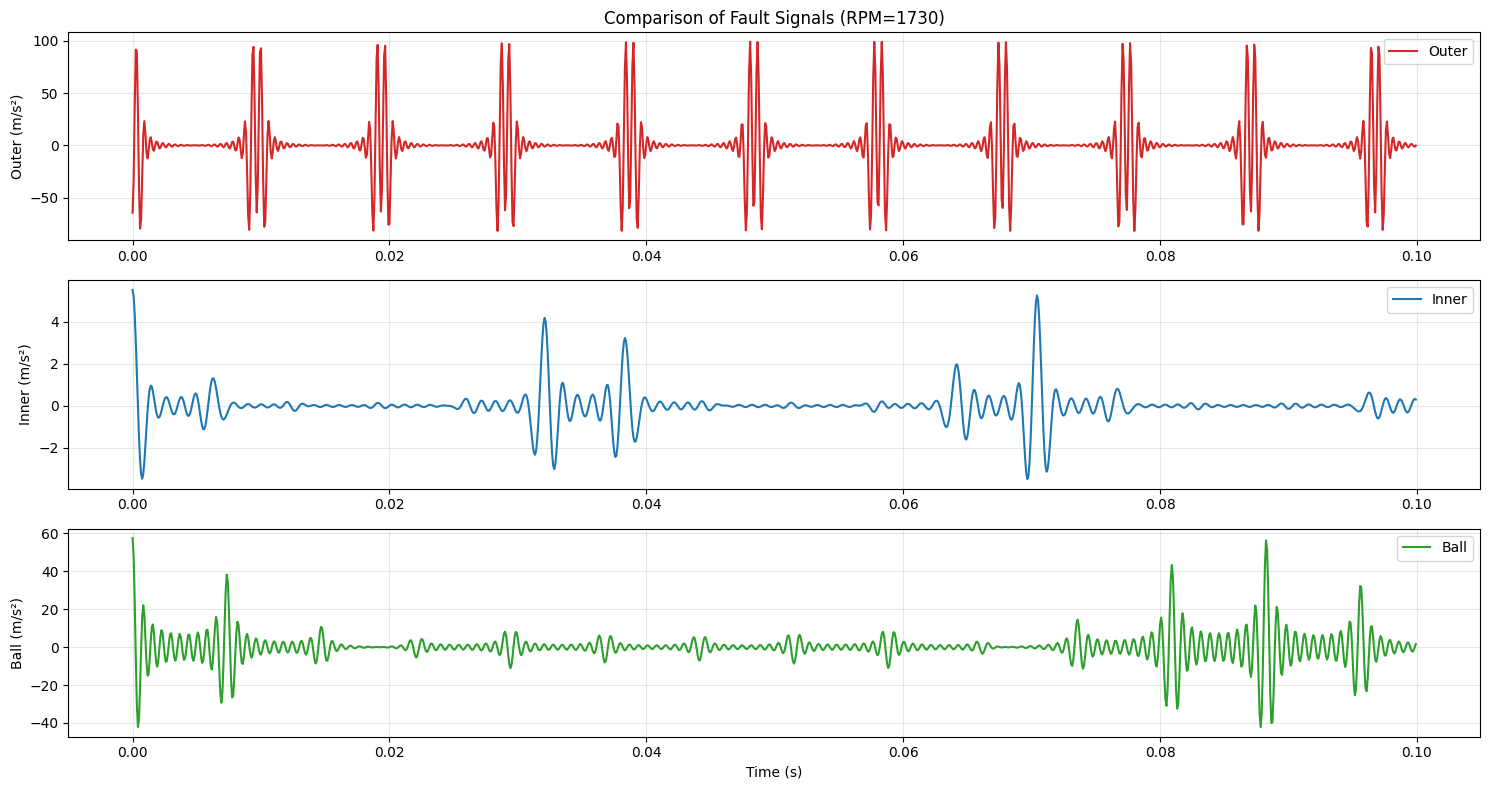

In [5]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(t_outer, sig_outer, color='tab:red', label='Outer')
plt.legend(loc='upper right')
plt.title(f'Comparison of Fault Signals (RPM={rpm_val})')
plt.ylabel('Outer (m/s²)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(t_inner, sig_inner, color='tab:blue', label='Inner')
plt.legend(loc='upper right')
plt.ylabel('Inner (m/s²)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
plt.plot(t_ball, sig_ball, color='tab:green', label='Ball')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Ball (m/s²)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()